In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from quickstats.plots import General1DPlot, TwoPanel1DPlot
from quickstats.extensions import ExtensionDataFrame
from paws.components import ResultLoader

outdir = "/pscratch/sd/c/chlcheng/projects/paws/outputs"

result_loader = ResultLoader('high_level', decay_modes=['qq', 'qqq'], variables="3,5,6")
# load back the gathered results
result_loader.load_parquet(f"{outdir}/summary/semi_weakly_kappa_study.parquet")

In [30]:
from quickstats.plots import General1DPlot
import matplotlib.pyplot as plt
import numpy as np
import os

styles = {
    (300, 300): {
        'legend': {
            'loc': (0.52, 0.4),
            'fontsize': 14
        },
        'text': {
            'fontsize': 15
        },
        'fill_between': {
            'alpha': 0.3
        },
        'xlabel': {
            'loc': 'center',
            'fontsize': 18,
        },
        'ylabel': {
            'fontsize': 18,
            'loc': 'center',
            'labelpad': 5
        },
        'ytick': {
            'steps': [1, 2, 5]
        }
    },
    (100, 500): {
        'legend': {
            'loc': (0.52, 0.43),
            'fontsize': 14
        },
        'fill_between': {
            'alpha': 0.3
        },
        'text': {
            'fontsize': 15
        },
        'xlabel': {
            'fontsize': 18,
            'loc': 'center',
        },
        'ylabel': {
            'fontsize': 18,
            'loc': 'center',
            'labelpad': 5
        },
        'ytick': {
            'steps': [1, 2, 5]
        }
    }    
}

feature_level_labels = {
    'high_level': 'High Level',
    'low_level': 'Low Level'
}

decay_mode_labels = {
    'qq': 'Two-Prong Decay',
    'qqq': 'Three-Prong Decay',
    'qq_qqq': 'Two + Three Prong Decay'
}
styles_map = {
    "ideal_weakly_noise": {
        "linestyle": "--"
    },
    "semi_weakly_noise": {
        "linestyle": "--"
    }
}
xlabel = r"S/B (%)"
ylabel = r"Significance Improvement ($\epsilon_B = 0.1\%$)"
xmin, xmax = 2.5e-4, 0.065
ymax_map = {
    (300, 300): 20,
    (500, 100): 15,
    (100, 500): 15
}

logx = True
ypad = 0
xticks      = [3e-4, 5e-4, 1e-3, 5e-3, 1e-2,  5e-2]
xticklabels = ['0.03', '0.05', '0.1', '0.5', '1',  '5']

def mu2sig(mu):
    # change this to the actual number of background events used in training + validation
    B = 183577 + 91763
    S = B * mu
    return S / B**0.5

def sig2mu(sig):
    # change this to the actual number of background events used in training + validation
    B = 183577 + 91763
    S = sig * B**0.5
    return S / B

apply_fix = False

# this fix is only applied to fix a bug in the production of the paper result where the signal fraction injected 
# to a weakly dataset is defined as S / B instead of S / (S + B)
# this has been fixed in the published code
def mufix(mu):
    N_bkg = 183577
    N_sig = mu * N_bkg
    mu = N_sig / (N_sig + N_bkg)
    return mu

xticks2 = mu2sig(np.array(xticks))
xticklabels2 = [str(round(v, 2)) for v in xticks2]

color_cycle = ["hh:darkpink",  "#BF51A0", "#deba87", "#3CAEA3", "#20639B"]

text_loc = {
    (300, 300): (0.455, 0.70),
    (500, 100): (0.585, 0.68),
    (100, 500): (0.455, 0.68)    
}
text_dy = 0.02

<Figure size 640x480 with 0 Axes>

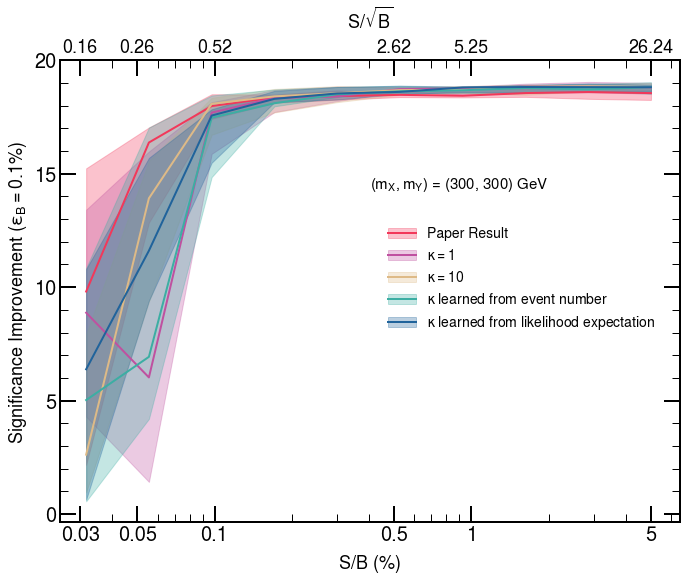

<Figure size 640x480 with 0 Axes>

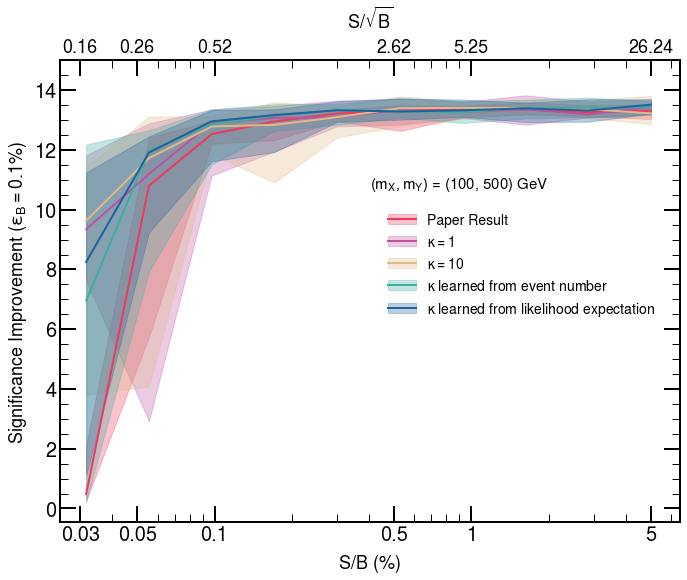

In [31]:
feature_level = 'high_level'
decay_mode = 'qq_qqq'
mass_points = [[300, 300], [100, 500]]
metric = 'sic_1e3'

label_map = {
    'original': 'Paper Result',
    'kappa_1p0': r'$\kappa = 1$',
    'kappa_10p0': r'$\kappa = 10$',
    'kappa_inferred': r'$\kappa$ learned from event number',
    'kappa_sampled': r'$\kappa$ learned from likelihood expectation'
}

for mass_point in mass_points:
    m1, m2 = mass_point

    df = result_loader.get_ensemble_result([metric], select={("m1", "m2"): (m1, m2)})

    df_ext = ExtensionDataFrame(df)
    dfs = {
        'original': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "final"
        }),
        'kappa_1p0': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "v1_no_kappa"
        }),
        'kappa_10p0': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "v1_kappa_10p0"
        }),
        'kappa_inferred': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "v1_kappa_inferred"
        }),
        'kappa_sampled': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "v1_kappa_sampled"
        }),
    }
    if apply_fix:
        for key, df in dfs.items():
            df = df.reset_index()
            df['mu'] = df['mu'].apply(mufix)
            dfs[key] = df
    plotter = General1DPlot(dfs, color_cycle=color_cycle,
                            label_map=label_map, styles=styles[(m1, m2)],
                            styles_map=styles_map)
    ifpr = metric.replace("sic_", "")
    #y_label_ = ylabel.format(ifpr=ifpr)
    ax = plotter.draw("mu", metric, f"{metric}_errlo", f"{metric}_errhi",
                      xlabel=xlabel, ylabel=ylabel,
                      xmin=xmin, xmax=xmax,
                      ymax=ymax_map[(m1, m2)],
                      logx=logx)
    plotter.draw_text(ax, f'$(m_X, m_Y)$ = ({m1}, {m2}) GeV',
                      0.5, 0.75)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax2 = ax.secondary_xaxis('top', functions=(mu2sig, sig2mu))
    ax2.tick_params(axis="x", which="major", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax2.tick_params(axis="x", which="minor", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax2.set_xticks(xticks2)
    ax2.set_xticklabels(xticklabels2)
    ax2.set_xlabel(r"$S/\sqrt{B}$", labelpad=10, fontsize=18)
    outname = f'plots/money_plots/high_level_qq_qqq_{m1}_{m2}_sig_1e3.pdf'
    plt.savefig(outname, bbox_inches='tight')
    plt.show()

In [32]:
feature_level ='high_level'
decay_mode = 'qq_qqq'
mass_points = [[300, 300], [100, 500]]
metrics = {
    'qq': ['m1_pred', 'm2_pred', 'mu_pred'],
    'qqq': ['m1_pred', 'm2_pred', 'mu_pred'],
    'qq_qqq': ['m1_pred', 'm2_pred', 'mu_pred', 'alpha_pred'],
}

In [33]:
styles = {
    'legend': {
        'loc': (0.66, 0.5),
        'fontsize': 18,
        'ncol': 2
    },
    'legend_lower': {
        'loc': (0.66, 0.22),
        'fontsize': 18,
        'ncol': 2
    },
    'text': {
        'fontsize': 18
    },
    'xlabel': {
        'fontsize': 18,
        'loc': 'center',
    },
    'ylabel': {
        'fontsize': 18,
        'loc': 'center',
        'labelpad': 5
    },
    'fill_between':{
        'alpha':0.3
    }
}

label_map = {
    'm1_pred': '$m_X$',
    'm2_pred': '$m_Y$',
    'mu_pred': r'$\mu$',
    'alpha_pred': r'$\alpha$',
}

feature_level_labels = {
    'high_level': 'High Level',
    'low_level': 'Low Level'
}

decay_mode_labels = {
    'qq': 'Two-Prong Decay',
    'qqq': 'Three-Prong Decay',
    'qq_qqq': 'Two + Three Prong Decay'
}
xlabel = r"S/B (%)"
ylabel_first = f"Predicted Mass (GeV)"
ylabel_second = f"Predicted Fraction (%)"
xmin, xmax = 2.5e-4, 0.07
ymin_first, ymax_first = 0.05 * 100, 6 * 100
ymin_second, ymax_second = xmin, 1.2
logx = True
logy_second = True
ypad = 0
xticks      = [3e-4, 5e-4, 1e-3, 5e-3, 1e-2,  5e-2]
xticklabels = ['0.03', '0.05', '0.1', '0.5', '1',  '5']
yticks_first = [100, 200, 300, 400, 500, 600]
yticklabels_first = ['100', '200', '300', '400', '500', '600']
yticks_second = [1e-3, 1e-2, 5e-2, 5e-1]
yticklabels_second = ['0.1', '1', '5', '50']

color_cycle = ["hh:darkpink", "#20639B"]
color_cycle_lower = ["#3CAEA3", "#deba87" ]

text_loc = (0.64, 0.2)
text_dy = 0.02


xticks2 = mu2sig(np.array(xticks))
xticklabels2 = [str(round(v, 2)) for v in xticks2]

scenario_map = {
    'original': 'Paper Result',
    'kappa_1p0': r'$\kappa = 1$',
    'kappa_10p0': r'$\kappa = 10$',
    'kappa_inferred': r'$\kappa$ learned from event number',
    'kappa_sampled': r'$\kappa$ learned from likelihood expectation'
}

<Figure size 640x480 with 0 Axes>

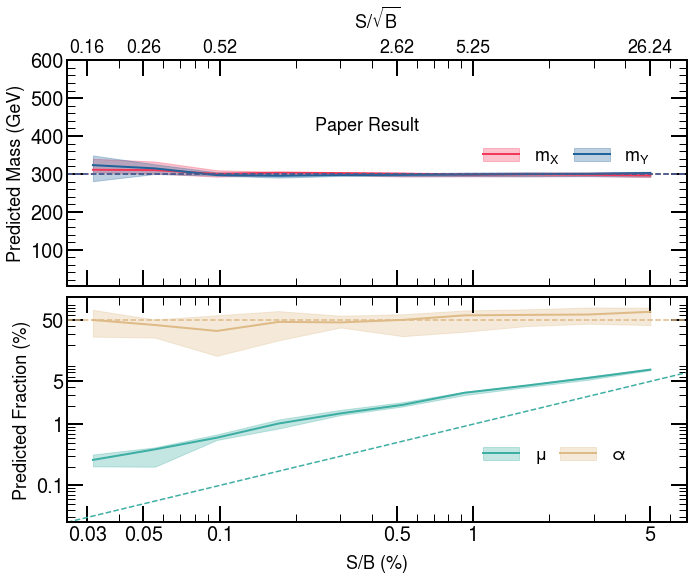

<Figure size 640x480 with 0 Axes>

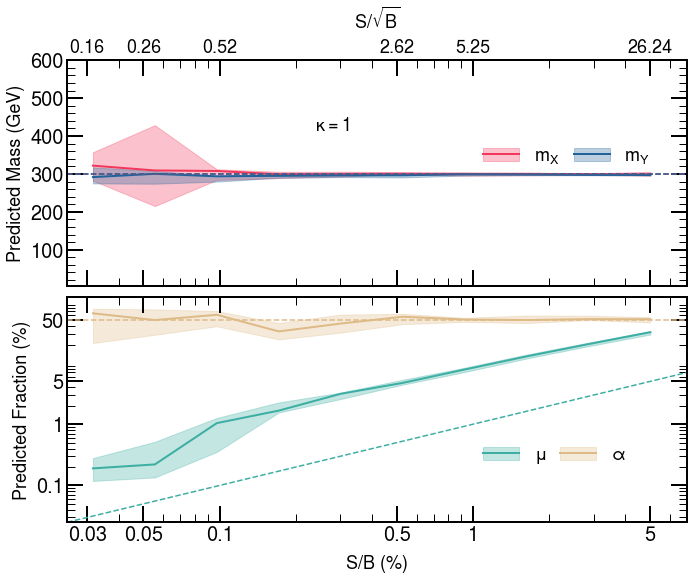

<Figure size 640x480 with 0 Axes>

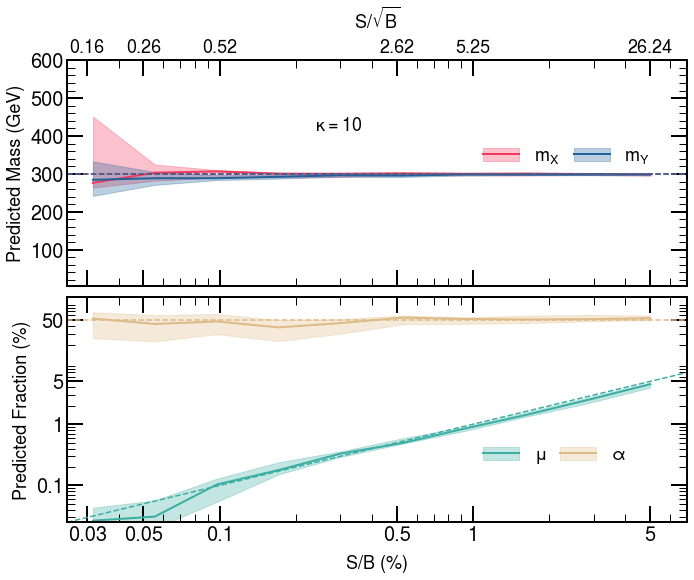

<Figure size 640x480 with 0 Axes>

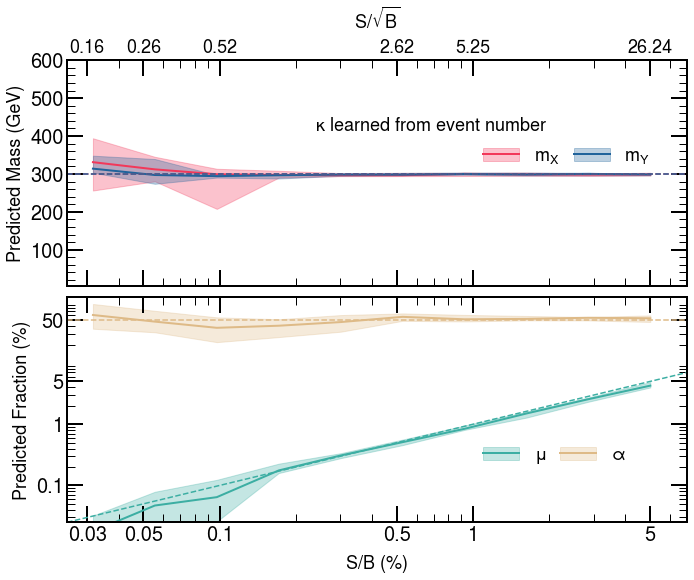

<Figure size 640x480 with 0 Axes>

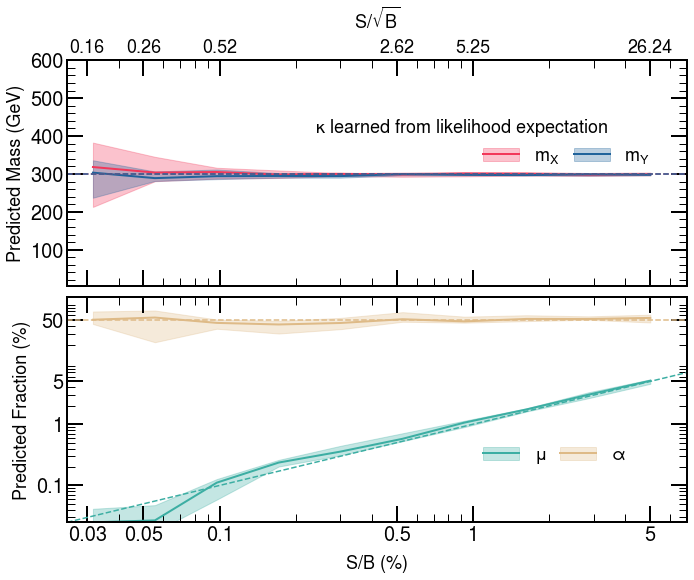

<Figure size 640x480 with 0 Axes>

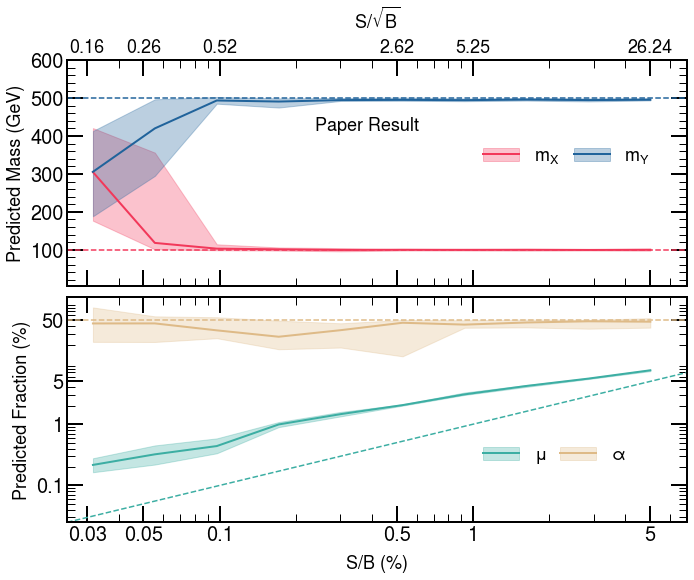

<Figure size 640x480 with 0 Axes>

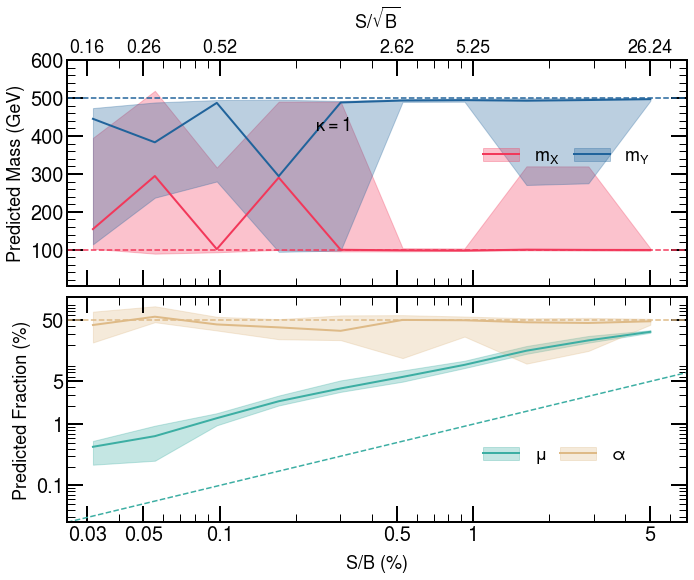

<Figure size 640x480 with 0 Axes>

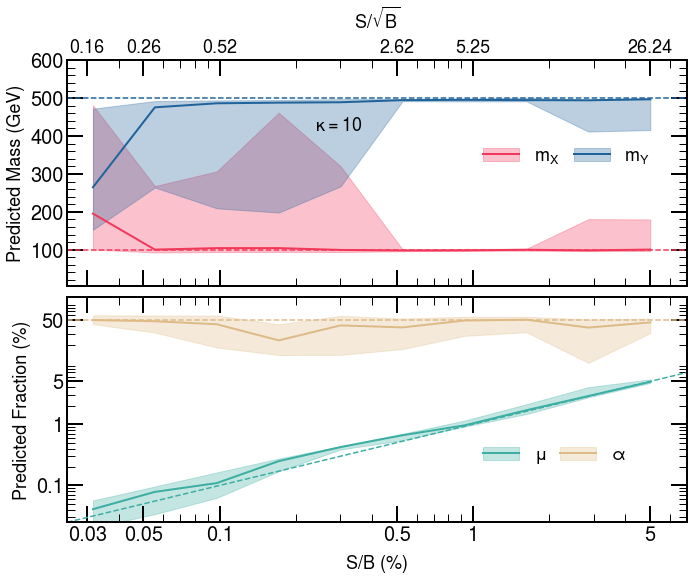

<Figure size 640x480 with 0 Axes>

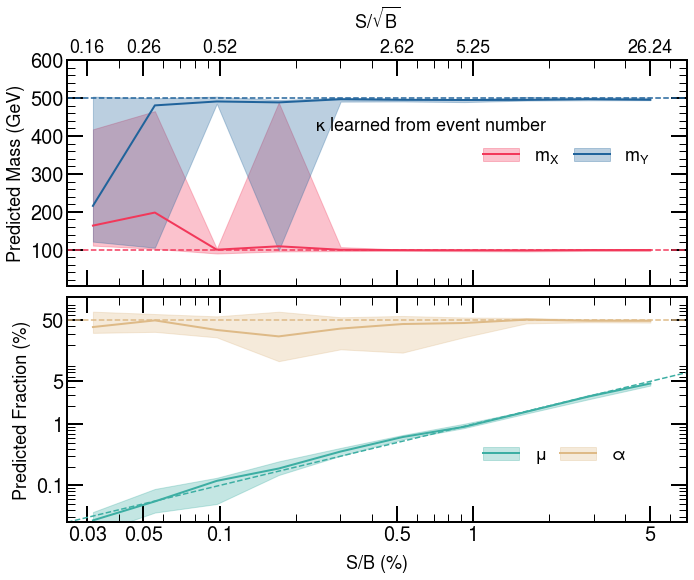

<Figure size 640x480 with 0 Axes>

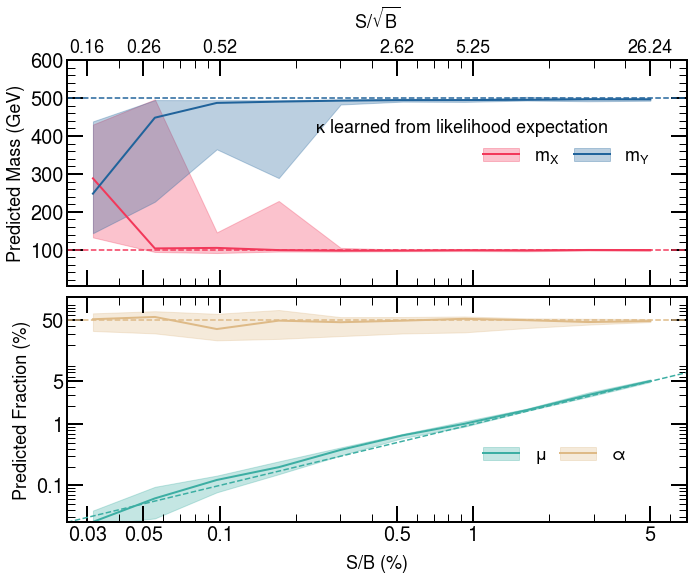

In [37]:
import os
import matplotlib.pyplot as plt

for mass_point in mass_points:
    m1, m2 = mass_point
    
    df = result_loader.get_ensemble_result(metrics[decay_mode], model_types=['semi_weakly'],
                                           select={("m1", "m2"): (m1, m2),
                                                   "noise_dim": 0})

    df_ext = ExtensionDataFrame(df)
    df_scenarios = {
        'original': df_ext.select_values(index={
            "version": "final"
        }),
        'kappa_1p0': df_ext.select_values(index={
            "version": "v1_no_kappa"
        }),
        'kappa_10p0': df_ext.select_values(index={
            "version": "v1_kappa_10p0"
        }),
        'kappa_inferred': df_ext.select_values(index={
            "version": "v1_kappa_inferred"
        }),
        'kappa_sampled': df_ext.select_values(index={
            "version": "v1_kappa_sampled"
        }),
    }

    for scenario, df in df_scenarios.items():
        dfs = {}
        for metric in metrics[decay_mode]:
            df_metric = df.copy()
            df_metric['param'] = df_metric[f'{metric}']
            df_metric['param_errlo'] = df_metric[f'{metric}_errlo']
            df_metric['param_errhi'] = df_metric[f'{metric}_errhi']
            if metric in ['m1_pred', 'm2_pred']:
                df_metric['param'] = df_metric['param'] * 100
                df_metric['param_errlo'] = df_metric['param_errlo'] * 100
                df_metric['param_errhi'] = df_metric['param_errhi'] * 100
            dfs[metric] = df_metric
            
        if apply_fix:
            for key, df in dfs.items():
                df = df.reset_index()
                df['mu'] = df['mu'].apply(mufix)
                dfs[key] = df
                
        plotter = TwoPanel1DPlot(dfs, color_cycle=color_cycle,
                                 color_cycle_lower=color_cycle_lower,
                                 label_map=label_map,
                                 styles=styles)
        ax, ax2 = plotter.draw("mu", "param",
                               targets_upper=["m1_pred", "m2_pred"],
                               targets_lower=["mu_pred", "alpha_pred"],
                               yerrloattrib=f"param_errlo",
                               yerrhiattrib=f"param_errhi",
                               xlabel=xlabel,
                               ylabel_upper=ylabel_first,
                               ylabel_lower=ylabel_second,
                               xmin=xmin, xmax=xmax,
                               logy_lower=logy_second,
                               ymin_upper=ymin_first,
                               ymax_upper=ymax_first,
                               ymin_lower=ymin_second,
                               ymax_lower=ymax_second,
                               logx=logx)
        
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels)
        ax.set_yticks(yticks_first)
        ax.set_yticklabels(yticklabels_first)
        ax2.set_yticks(yticks_second)
        ax2.set_yticklabels(yticklabels_second)
        ax.axhline(m1, linestyle='--', color=plotter.cmap.colors[0])
        ax.axhline(m2, linestyle='--', color=plotter.cmap.colors[1])
        mu_arrays = np.linspace(xmin, xmax, 100)
        ax2.plot(mu_arrays, mu_arrays, linestyle='--', color=plotter.cmap_lower.colors[0])
        if decay_mode == 'qq_qqq':
            ax2.axhline(0.5, linestyle='--', color=plotter.cmap_lower.colors[1])
        
        ax3 = ax.secondary_xaxis('top', functions=(mu2sig, sig2mu))
        ax3.tick_params(axis="x", which="major", length=0,
                        width=0, labeltop=True, labelbottom=False,
                        top=True, bottom=False, direction='in',
                        labelsize=18)
        ax3.tick_params(axis="x", which="minor", length=0,
                        width=0, labeltop=True, labelbottom=False,
                        top=True, bottom=False, direction='in',
                        labelsize=18)
        ax3.set_xticks(xticks2)
        ax3.set_xticklabels(xticklabels2)
        ax3.set_xlabel(r"$S/\sqrt{B}$", labelpad=10, fontsize=18)
        plotter.draw_text(ax, scenario_map[scenario], 0.4, 0.75)
        outname = f'plots/money_plots/high_level_qq_qqq_{m1}_{m2}_params_{scenario}.pdf'
        plt.savefig(outname, bbox_inches='tight')
        plt.show()

In [36]:
!tar -zcf plots.tar.gz plots

In [1]:
from keras import backend as ops

2024-10-05 02:10:11.049357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 02:10:11.049397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 02:10:11.050942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 02:10:11.059319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 02:10:12.347478: W tensorflow/compiler/tf2

In [2]:
ops

<module 'keras.backend' from '/pscratch/sd/c/chlcheng/local/miniconda/envs/ml-legacy/lib/python3.11/site-packages/keras/backend/__init__.py'>